<a href="https://colab.research.google.com/github/gkadusumilli/CNN-architectures/blob/main/LeNet_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<center>CNN Architectures </center>


#<center> Part 1: LeNet-5 implementation using keras<center>

In this notebook we will build LeNet model from the scratch using keras.

Link to the LeNet Paper: http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf

**LeNet-5 was proposed by Lecun et al. in the year 1998.**

The architecture contain five weight layers hence name LeNet-5 : Three convolutional layers and two fully connected layers.



LeNet architecture

![LeNet-5](https://drek4537l1klr.cloudfront.net/elgendy/v-3/Figures/05_01.png)




Input image --> Conv 1 --> Tanh --> S2 (Subsampling /pooling) --> Conv 3 --> Tanh --> S4 (subsampling / pooling) --> Conv 5 --> Tanh --> FC 6 --> Softmax 7

Here one thing to notice is **Tanh** activation function is used in the hidden layers. This is because in 1998 ReLu layer was not introduced.


* **Number of filters in each convolutional layer**

>>Depth (Number of filters)

>>Conv 1 - 6

>>Conv 3 - 16

>>Conv 5 - 120 

* **The kernel_size is 5 x 5**

* **Subsampling (pooling) layers**

>>The **pool size is 2**, added after the each convolutional layer.

>>*The authors have used **average pooling**, which computes the average value of its inputs.*

* **Activation function**: The creators have used **tanh** activation function for the hidden layers. Since symmetric functions are believed to yield *faster convergence than the sigmoid functions*

>>$tanh = \frac{e^x - e^{-x}}{e^x + e^{-x}} $







formula to calculate the layer dimensions

$N_{out} = {\frac{[n_{in} + 2p - k]}{s}} + 1$

Example

* **Conv layer 1**

>>$Conv 1 = {\frac{[32 + (2x0) - 5]}{1}} + 1$ = $28$

* S2 (Sub sampling) - Average pooling of (2, 2) result 14 x 14

* **Conv layer 3**

> > $Conv 3 = {\frac{[14 + (2x0) - 5]}{1}} + 1$ = $10$

* S4 (Subsampling) - Average pooling of (2,2) result 5 x 5








##Keras Implementation

####1. Load MNIST Database

Features of MNIST dataset

* 70,000 Images of hand-written images

* Easy access and downloading the data

* Image dimensions: $28 * 28$

* Grayscale images


In [ ]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("training images %d." % len(X_train))
print("test images %d" % len(X_test))

training images 60000.
test images 10000


####2. Visualize the training images

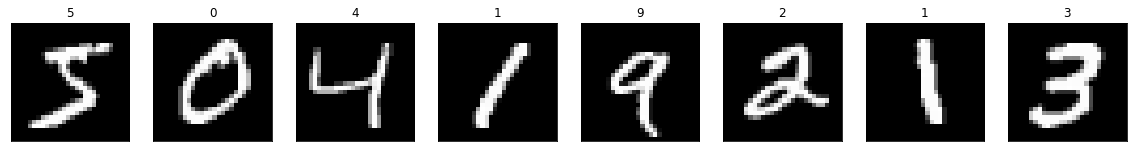

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

#plot few 8 training images

fig = plt.figure(figsize=(20,20))
for i in range(8):
  ax = fig.add_subplot(1, 8, i+1, xticks=[], yticks=[])
  ax.imshow(X_train[i], cmap='gray')
  ax.set_title(str(y_train[i]))

####3. Image in detail

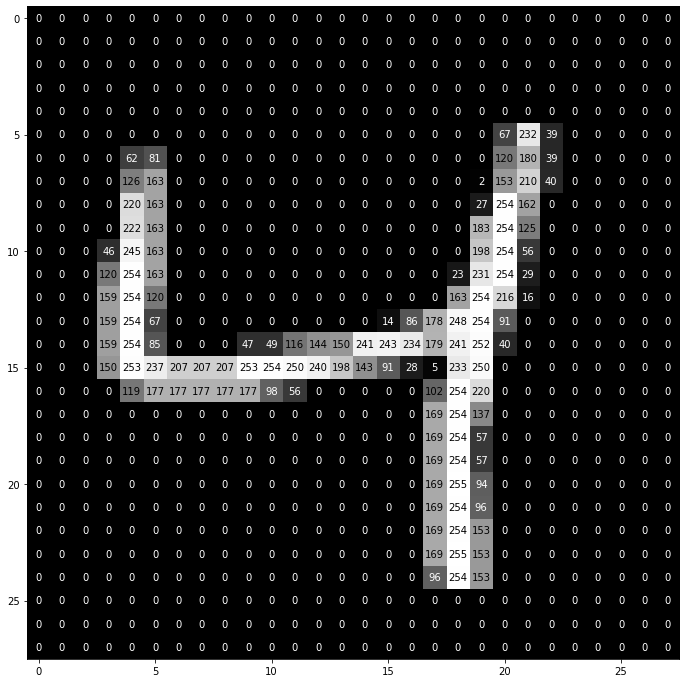

In [ ]:
def visualize_input(img, ax):
  ax.imshow(img, cmap='gray')
  width, height = img.shape
  thresh = img.max()/2.5
  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                  horizontalalignment='center',
                  verticalalignment='center',
                  color='white' if img[x][y] < thresh else 'black')

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
visualize_input(X_train[2], ax)

####4. Preprocess input images: Rescaling the images by dividing every pixel in the image by 255###

Normalizing the pixels between 0-1 

Example:

$0/255 = 0$, $254/255=0.99$, $169/255=0.66$

In [ ]:
#Normalize the data to accelarate learning

mean = np.mean(X_train)
std = np.std(X_train)

X_train = (X_train - mean)/(std+1e-7)
X_test = (X_test - mean)/(std + 1e-7)

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train_samples')
print(X_test.shape[0],'test_samples')

X_train shape: (60000, 28, 28)
60000 train_samples
10000 test_samples


####5. Preprocess the labels: Encode Categorical Integer Labels using One Hot Scheme

In [ ]:
from keras.utils import np_utils

num_classes = 10
#print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# OHE the labels
#convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

#print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


####6. Reshape data to fit our CNN (and input_shape)

In [ ]:
#input image dimensions 28 x 28 pixel images

img_rows, img_cols = 28,28

X_train = X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test = X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
input_shape = (img_rows, img_cols,1)

print('Image input shape: ', input_shape)
print('x_train shape: ', X_train.shape)

Image input shape:  (28, 28, 1)
x_train shape:  (60000, 28, 28, 1)


####7. Model architecture

![LeNet-5](https://drek4537l1klr.cloudfront.net/elgendy/v-3/Figures/05_01.png)



In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

In [ ]:
#Instantiate an empty model

model = Sequential()

#C1 Convolutional layer

model.add(Conv2D(6, kernel_size=(5,5),strides=(1,1),activation='tanh',input_shape=input_shape,padding='same'))

#S2 - Pooling layer

model.add(AveragePooling2D(pool_size=(2,2),strides=(1,1),padding='valid'))

#C3 - Convolutional layer

model.add(Conv2D(16, kernel_size=(5,5), strides=(1,1),activation='tanh',padding='valid'))

#S4 pooling layer

model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

# C5 Fully Connected convolutional layer

model.add(Conv2D(120,kernel_size=(5,5),strides=(1,1),activation='tanh',padding='valid'))

#Flatten the CNN output so that we can connect it with the fully connected layers

model.add(Flatten())

#Fc6 fully connected layer

model.add(Dense(84, activation='tanh'))

#output layer with the softmax function

model.add(Dense(10, activation='softmax'))

#print the model summary

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 27, 27, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 23, 23, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 120)         48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 5880)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

Formula to calculate the number of parameters

>$N_{param} = (n \times m \times l + 1) \times f$

>$N_{param}$ - Number of parameters, $(n \times m)$ - dimensions of kernel, l - input image, f - filter size


* Conv 1 param = $(5 \times 5 \times 1 + 1) \times 6$ = 156 parameters

* Conv 3 params = $(5 \times 5 \times 6 + 1) \times 16$ = 2416 parameters

* Conv 5 params = $(5 \times 5 \times 16 + 1) \times 120$ = 48120 parameters







####8. Compile the model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

####9. Train the model

LeCun and his team used **Scheduled decay learning** where the value of the learning rate was decreased using the following schedule

* 0.0005 for the first two epochs

* 0.0002 fir the next three epochs

* 0.00005 for the next four epochs

* then 0.00001 thereafter


*In the paper, **author has trained for the 20** epochs*


In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

#set te learning rate schedule as mentioned in the paper

def lr_schedule(epoch):
  if epoch <=2:
    lr = 5e-4
  elif epoch>2 and epoch <=5:
    lr = 2e-4
  elif epoch>5 and epoch<=9:
    lr = 5e-5
  else:
    lr = 1e-5
  return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

#set the checkpointer

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5',verbose=1, save_best_only=True)

#train the model

hist = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test,y_test),callbacks=[checkpointer, lr_scheduler],
                 verbose=2, shuffle=True)



Epoch 1/20
1875/1875 - 5s - loss: 0.1623 - accuracy: 0.9526 - val_loss: 0.0734 - val_accuracy: 0.9772

Epoch 00001: val_loss improved from inf to 0.07337, saving model to model.weights.best.hdf5
Epoch 2/20
1875/1875 - 4s - loss: 0.0748 - accuracy: 0.9780 - val_loss: 0.0588 - val_accuracy: 0.9819

Epoch 00002: val_loss improved from 0.07337 to 0.05877, saving model to model.weights.best.hdf5
Epoch 3/20
1875/1875 - 4s - loss: 0.0668 - accuracy: 0.9801 - val_loss: 0.0619 - val_accuracy: 0.9791

Epoch 00003: val_loss did not improve from 0.05877
Epoch 4/20
1875/1875 - 4s - loss: 0.0437 - accuracy: 0.9867 - val_loss: 0.0406 - val_accuracy: 0.9871

Epoch 00004: val_loss improved from 0.05877 to 0.04062, saving model to model.weights.best.hdf5
Epoch 5/20
1875/1875 - 4s - loss: 0.0355 - accuracy: 0.9892 - val_loss: 0.0353 - val_accuracy: 0.9890

Epoch 00005: val_loss improved from 0.04062 to 0.03534, saving model to model.weights.best.hdf5
Epoch 6/20
1875/1875 - 4s - loss: 0.0313 - accuracy: 0

####10. Load the model with the best classification accuracy on the validation set


In [ ]:
#load the model that yielded the best validation accuracy
model.load_weights('/content/model.weights.best.hdf5')

####11. Calculate the classification accuracy on the test set


In [ ]:
#evaluate the test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

#print the accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 99.0800%


####12. Evaluate the model

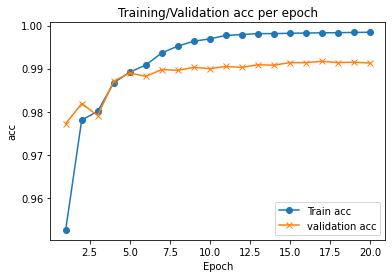

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()

ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')

#plot the legend and use the best location autonmatically : loc =0 

ax.legend(['Train acc', 'validation acc'],loc=0)
ax.set_title('Training/Validation acc per epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')
plt.show()

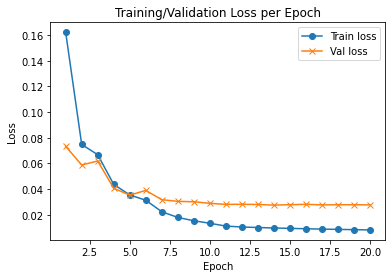

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train loss', "Val loss"], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.show()

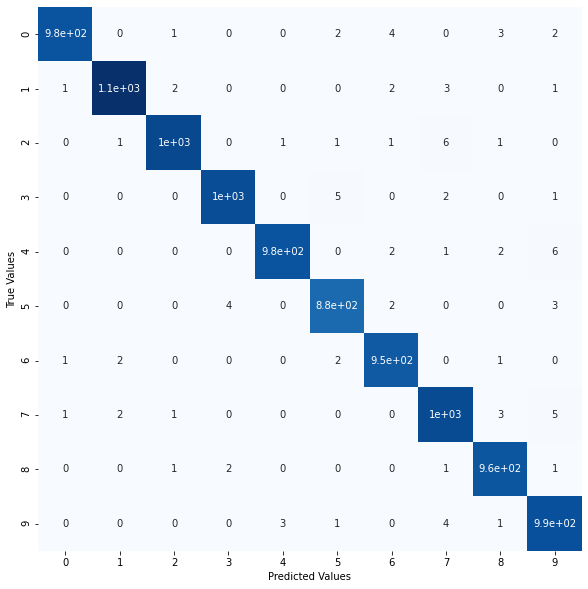

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(X_test) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

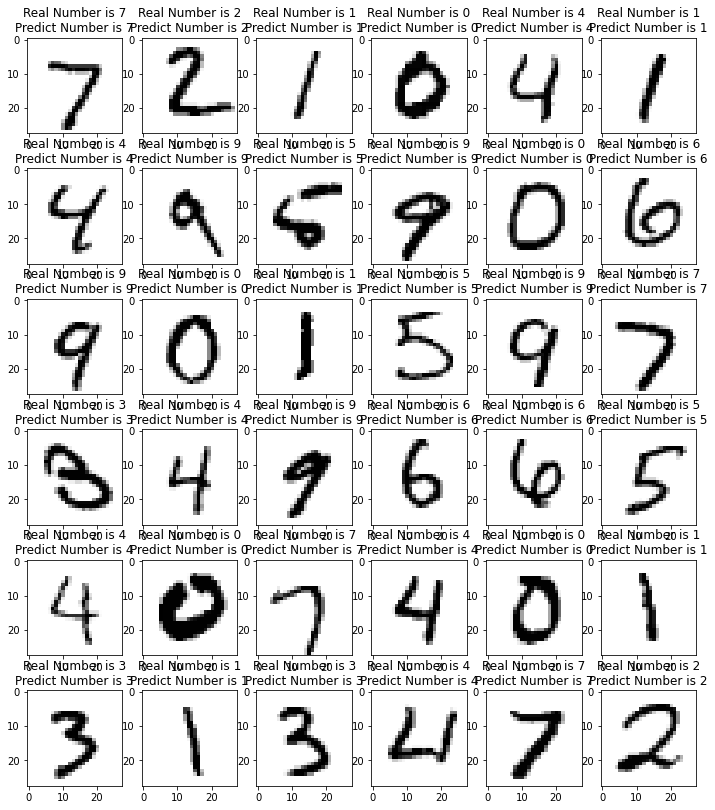

In [ ]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(6, 6, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

In [ ]:

pr=np.argmax(model.predict(X_test), axis=-1)
print(pr)


[7 2 1 ... 4 5 6]
